# Name:

<font size = '5' color='Red'>
Final score: 14.25/15
</font>

James Lawson

## Lab 4

Part of this laboratory is based on material you have learned in class. However, a large portion of a data scientist's job is to study documentation and research additional materials. To make you prepared for such a constantly changing data landscape, several problems in this or other labs may rely on functions and methods which haven't been covered in class. A large portion of this assignment grade will be reflecting your ability to adapt new functions and methods using documentation and/or online resources. 

For example: if you needed to know how to take the square root of a number in Python, you could google: 'square root function python'. This search would direct you to the function sqrt() in the math library.

**Directions:**

Please compose your code in the appropriate Jupyter Notebook cell below the problem desription. Make sure to provide a printout in requested format.

**Lab Policies**:

   -   If your running your code leads to an **error message**, your grade for this code will be **reduced by 100%**.

   -  To get full credit for each  problem, your code should produce a neat and informative output. Depending on the problem, you will be asked to produce either informative printout or type a written conclusion. If you were asked to calculate the number of instances of the letter 'e' in the string: 'Old MacDonald had a farm.', your printout would look say something like: 'Number of 'e' characters in the string = 0'. See specific details in the individual problem descriptions.

   - Data for each problem are given to you in the format most convenient to the data collector. It is not necessarily (and in fact almost never) the most convenient format for data analysis. You can choose to either to work with the given format or convert it to any of the other variable types studied in class. However, you are not allowed to just re-type the data. All type conversions should be done algorithmically.

   - You are welcome to consult with your classmates and ANY online resources while working on this lab. Feel free to adapt (copy and paste and then change) any code from pre-class tutorials and workshops. It is never useful to needlessly duplicate effort.

##  Problem 1: GDP of world countries (7 pts)

#### DATA
The data set **gapminder.csv** is provided for this lab. This file contains the data from the [gapminder](https://www.gapminder.org/) website, which you have already explored in the tutorial for Class 6. 

The file has the following fields:
- **ID** numerical identifier for each country.
- **country** Country name.
- **year** The year of data collection
- **population** Estimated total population at mid-year, including all residents, apart from refugees.
- **cont** Continent each country belongs to
- **life_expect**  Life expectancy at birth, in years.
- **gdp_cap** Gross Domestic Product per capita in current international dollars, corrected for purchasing power in different territories.

###  (A) Import the dataset into a data frame

Import the file **gapminder.csv** into a DataFrame called **df**. Use each country's name as the index.  Print the first 6 rows of **df**.

In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
#df is created with data from "gapminder.csv"
df = pd.read_csv("gapminder.csv", index_col = "country")
#first 6 rows are printed
df.head(6)

,ID,year,population,cont,life_exp,gdp_cap
country,,,,,,
Afghanistan,11,2007,31889923,Asia,43.828,974.580338
Albania,23,2007,3600523,Europe,76.423,5937.029526
Algeria,35,2007,33333216,Africa,72.301,6223.367465
Angola,47,2007,12420476,Africa,42.731,4797.231267
Argentina,59,2007,40301927,Americas,75.320,12779.379640
Australia,71,2007,20434176,Oceania,81.235,34435.367440


### (B) Determine the countries with the highest and lowest total GDP

Calculate the total GDP by multiplying per capita GDP by country population. Make an additional column **gdp_total** which contains total GDP for each country in millions of dollars. Sort countries by their total GDP and print the top ten countries with largest GDP.

In [2]:
#new column "gdp_total" is created by multiplying column "gdp_cap" and "population"
df['gdp_total'] = df['gdp_cap'] * df['population'] / 1000000

#countries are sorted by thier total GDP
dfSorted = df.sort_values(by =['gdp_total'],ascending = False)

#top 10 countries with the largest GDP are printed
print("The 10 countries with the highest total GDP are the following: ", ", ".join(dfSorted.index[:10]))

The 10 countries with the highest total GDP are the following:  United States, China, Japan, India, Germany, United Kingdom, France, Brazil, Italy, Mexico


### (C) Distribution of life expectancy over different continents

Plot histograms of the life expectancy distribution for the different continents represented in the dataset. 
Note 1: Only plot a meaningful distribution. Do not plot a distribution if you have less than 5 countries. Make sure to check this condition algorithmically, not manually. 
Note 2: To provide meaningful comparisons, make sure that all of your histograms have the same range of x- and y- axis and the same number of bins.
Note 3: Although using loops can slow down analysis of big datasets, they can be very useful in plotting. Since the commands for each subplot are very similar, please use **for** or **while** loops for plotting individual subplots.

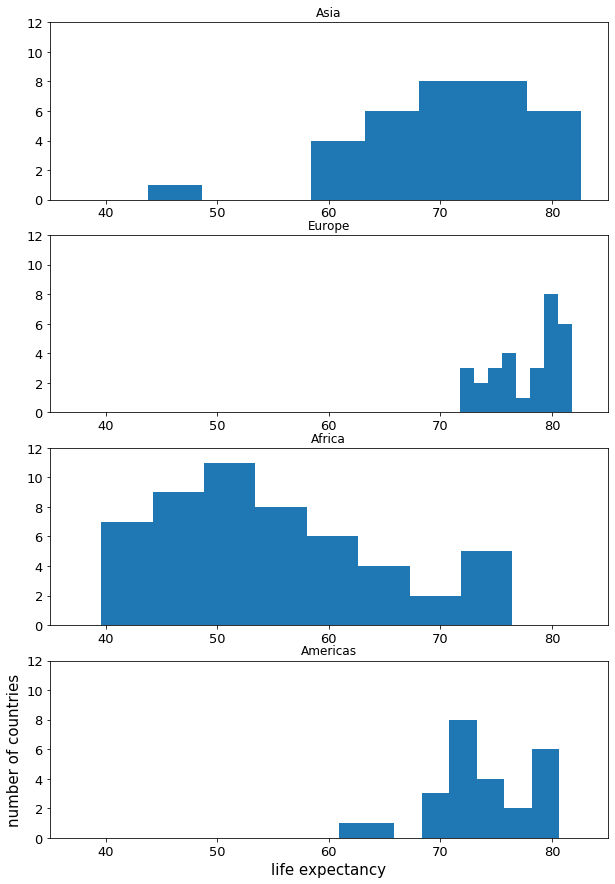

In [3]:
#figure size is set
plt.figure(figsize = (10, 15))

#count is set to 1
count = 1

#unique continents variable is set
unique_conts = df.cont.unique()

for thing in unique_conts:
    new_df = df[df.cont == thing]
    #size is greater than 5
    if new_df.shape[0] > 5:
        #new subdata frames with continents
        plt.subplot(4,1,count)
        life_exp = new_df['life_exp']
        plt.hist(life_exp, bins = 8)
        count = count + 1
        
        #title is added
        plt.title(thing)
        
        #x and y limits are set
        plt.ylim(0, 12)
        plt.xlim(35, 85)

        #x and y ticks are set
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)

#axix labels
plt.xlabel('life expectancy', fontsize=15)
plt.ylabel('number of countries', fontsize=15)

#plot is shown
plt.show()

<font size = '5' color='Red'>
When plotting stacked histograms, you need to specify a range() argument within your plt.hist() function so that all four histograms will plot bins using the same start and end point. This allows for a more honest comparison between the distribution.

-1/4 point
</font>

## Conclusion:

In the cell below, provide a brief description of the trend in th edistribution of life expectancy in different continents.

There is a large difference in the life expectancies in different continents. The continents with the highest life expectancy is Europe and the Americas. Africa is the continent with the lowest life expectancy. Asia has a life expectancy in between the three aformentioned continents.

## Problem 2: Diabetes mortality in OECD countries(8 pts)

#### DATA
The second file provided for this lab, **oecd_diabetes.csv**  contains the data on mortality from Diabetes-related causes within the Organisation for Economic Co-operation and Development(OECD) countries.  The file has the following fields:
- **COU** Three-letter abbreviation for each country.
- **country** Country name.
- **year** Year of data collection
- **diabetes_mortality** Mortality from diabete-related causes. Calculated as number of deaths per 100000 population.

###  (A)Countries with highest and lowest mortality from diabetes

Import the file **oecd_diabetes.csv** into a dataframe named **df_diabetes**. Use each country's name as an index.  Print the first 6 rows of **df_diabetes**. Sort countries by diabetes mortality from highest to lowest, and print the top ten countries with highest diabetic mortality.

In [4]:
#df is created with data from "gapminder.csv"
df_diabetes = pd.read_csv("oecd_diabetes.csv", index_col = "country")

#first 6 rows in df_diabetes are displayed
display(df_diabetes.head(6))

#values are sorted
dfSorted = df_diabetes.sort_values(by =['diabetes_mortality'],ascending = False)

#top 10 countries with the highest diabetes mortality are printed
print("The 10 countries with the highest diabetes mortality are the following: ", ", ".join(dfSorted.index[:10]))

,COU,year,diabetes_mortality
country,,,
Greece,GRC,2007,12.6
Australia,AUS,2007,18.3
Denmark,DNK,2007,23.9
New Zealand,NZL,2007,20.1
Israel,ISR,2007,34.0
Germany,DEU,2007,26.6


The 10 countries with the highest diabetes mortality are the following:  Mexico, Portugal, Austria, Israel, Italy, Hungary, Germany, Denmark, United States, Czech Republic


### (B) Comparing the gapminder and OECD datasets

How many countries are in the OECD dataframe (make an informative printout of this answer). Does the **df** dataframe from **gapminder.csv** data set contain all of the OECD countries? How many total countries are in the **df** data frame? Which OECD countries are missing (provide an informative printout)?

In [5]:
#numpy is imported
import numpy as np

#shapes are printed
print("There are ", df_diabetes.shape[0], "countries in the OECD dataframe")
print("There are ", df.shape[0], "countries in the gapminder dataframe")

#in df_diabetes but not in array df
difference = np.setdiff1d(df_diabetes.index, df.index)

#print statement for countries in the OECD but not in Gapminder
print("The countries in the OECD dataframe but not in Gapminder are the following: ", ", ".join(difference))

There are  35 countries in the OECD dataframe
There are  142 countries in the gapminder dataframe
The countries in the OECD dataframe but not in Gapminder are the following:  Estonia, Korea, Latvia, Lithuania, Luxembourg


### (C) Demographics of OECD countries

Make a new DataFrame named **df_oecd** which contains *population*, *continent*, *life expectancy*, *total GDP*, and *diabetes_mortality* for the OECD COUNTRIES ONLY. 

Notice that the data for some of the OECD countries are missing in the **gapminder.csv** dataset. If your data frame contains rows for countries with missing data, please remove such rows (the **.dropna** method can be useful here). 

How many countries are in your df_oecd dataframe? Is the number of rows the same as the number of countries you have determined in the previos sub-question? Sort by population size and print the data for the 10 most populous countries.

**Answer all of the above questions with informative output.**

In [6]:
#intersection of df and df_diabetes
shared_countries = np.intersect1d(df.index, df_diabetes.index)

#new dataframe is created
df_oecd = df.loc[shared_countries,["population", "cont", "life_exp", "gdp_total", "diabetes_mortality"]]
df_oecd.diabetes_mortality = df_diabetes.loc[shared_countries,["diabetes_mortality"]]

#rows with missing data are removed
df_oecd.dropna(how = 'any')

#print statements
print("There are ", df_oecd.shape[0], "countries in the df_oecd datadrame")
print("There were 5 countries who were in OECD dataframe but not in Gapminder. Therefore, the number of overlapping countries is 5 less than was in the original OECD dataframe")

#data is sorted
oecdSorted = df_oecd.sort_values(by ='population',ascending = False)

#first 10 values are printed
oecdSorted.head(10)

There are  30 countries in the df_oecd datadrame
There were 5 countries who were in OECD dataframe but not in Gapminder. Therefore, the number of overlapping countries is 5 less than was in the original OECD dataframe


/Users/asackman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,population,cont,life_exp,gdp_total,diabetes_mortality
country,,,,,
United States,301139947,Americas,78.242,1.293446e+07,23.7
Japan,127467972,Asia,82.603,4.035135e+06,10.9
Mexico,108700891,Americas,76.195,1.301973e+06,63.0
Germany,82400996,Europe,79.406,2.650871e+06,26.6
France,61083916,Europe,80.657,1.861228e+06,17.2
United Kingdom,60776238,Europe,79.425,2.017969e+06,10.4
Italy,58147733,Europe,80.546,1.661264e+06,34.0
Spain,40448191,Europe,80.941,1.165760e+06,22.4
Poland,38518241,Europe,75.563,5.927928e+05,16.7


### (D) Combine demographics and diabetes data for OECD countries

Add another column to **df_oecd** called **total_diabetes_mortality**. Calculate thev total number of deaths from diabetes in each of the countries. Print a DataFrame of the countries with the top ten diabetic mortality values.

In [7]:
#new column is added with total diabetes mortality
oecdSorted['total_diabetes_mortality'] = oecdSorted['diabetes_mortality'] * 100000

#data is sorted
oecdSorted = oecdSorted.sort_values(by ='total_diabetes_mortality',ascending = False)

#top 10 values are printed
oecdSorted.head(10)

,population,cont,life_exp,gdp_total,diabetes_mortality,total_diabetes_mortality
country,,,,,,
Mexico,108700891,Americas,76.195,1.301973e+06,63.0,6300000.0
Portugal,10642836,Europe,78.098,2.182808e+05,41.7,4170000.0
Austria,8199783,Europe,79.829,2.962294e+05,37.6,3760000.0
Italy,58147733,Europe,80.546,1.661264e+06,34.0,3400000.0
Israel,6426679,Asia,80.745,1.640299e+05,34.0,3400000.0
Hungary,9956108,Europe,73.338,1.792990e+05,30.1,3010000.0
Germany,82400996,Europe,79.406,2.650871e+06,26.6,2660000.0
Denmark,5468120,Europe,78.332,1.929066e+05,23.9,2390000.0
United States,301139947,Americas,78.242,1.293446e+07,23.7,2370000.0


<font size = '5' color='Red'>
When you created your total diabetes mortality column, you just multiplied diabetes_mortality per 1000 people by 100000, rather than multiplying by the nation's population. This also affected your plot further down.
   

-1/2 point
</font>

### (E) Plot diabetes mortality vs. total GDP for different countries

Make a scatter plot for diabetes mortality vs. total GDP for OECD countries. Use a different color for each of the different geographical regions. Be sure to include a legend that tells us what region each color represents. Include informative axes with font sizes equal to 14.

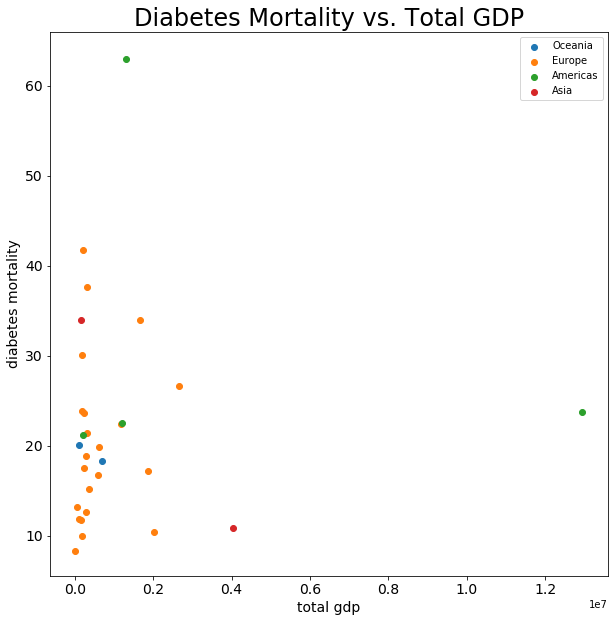

In [8]:
#figure size is changed to a 10" x 10"
plt.figure(figsize=(10,10)) 

#new variable is created with unique()
unique = df_oecd.cont.unique()

#scatterplots are created
for thing in unique:
    new_df = df_oecd[df_oecd.cont == thing]
    plt.scatter(new_df.gdp_total, new_df.diabetes_mortality, label = thing)

#legend
plt.legend(loc="best")

#title is added
plt.title("Diabetes Mortality vs. Total GDP", fontsize=24)

#x and y labels are added
plt.ylabel("diabetes mortality", fontsize=14)
plt.xlabel("total gdp", fontsize=14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#scatterplot is displayed
plt.show()

 ###  (F) Conduct your own analysis of diabetes in OECD

Do you think the graph above is enough to make a conclusion about diabetes-related mortality in developed countries? Conduct additional data exploration, and make at least one meaningful plot. In the final cell block at the bottom of the page, provide a brief written description of your findings.

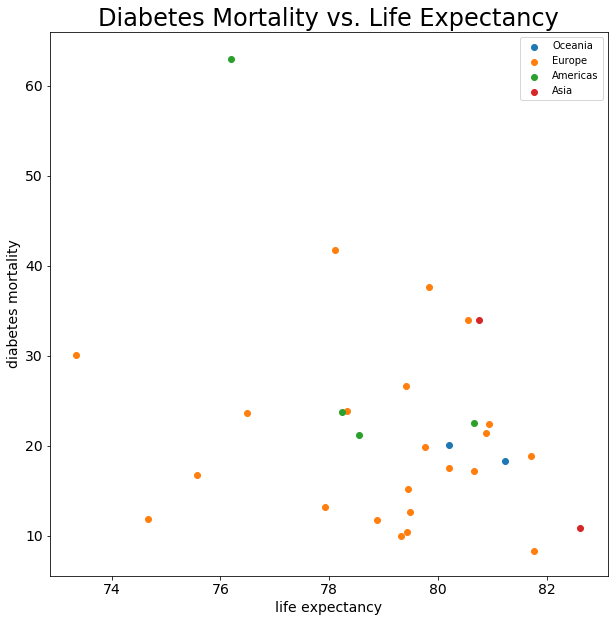

In [9]:
#figure size is changed to a 10" x 10"
plt.figure(figsize=(10,10)) 

unique = df_oecd.cont.unique()



for thing in unique:
    new_df = df_oecd[df_oecd.cont == thing]
    plt.scatter(new_df.life_exp, new_df.diabetes_mortality, label = thing)

    
    
#legend
plt.legend(loc="best")

#title is added
plt.title("Diabetes Mortality vs. Life Expectancy", fontsize=24)

#x and y labels are added
plt.ylabel("diabetes mortality", fontsize=14)
plt.xlabel("life expectancy", fontsize=14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#scatterplot is displayed
plt.show()

#### Conclusion

We found that the rate of diabetes mortality does not have a correlation on life expectancy in our data. If a significant percentage of people in a country died from diabetes mortality, then the diabetes mortality rate would have a significant correlation on life expectancy.